In [1]:
import os
import pandas as pd
from tqdm import tqdm
import time
import numpy as np

In [2]:
# directory = "C:\\Users\\benja\\OneDrive - University of Tennessee\\Land Appraisal\\Rural Appraisal Data"

# valid_columns = [
#     "OID", "JUR", "TAXYR", "ST_NUM", "ADDRESS", "PT", "WATERSEWER", "ELEC", "GAS", "CAMADEEDAC",
#     "CAMACALCAC", "LANDUNITS", "SUBDIV", "LOT", "LNDAPRDATE", "BLDGS", "NUM_MH", "TOPO", "ROADTYPE",
#     "DISTRICT", "LANDUSE", "IMPTYPE", "IMP", "YRBLT", "EFFYRBLT", "STORIES", "EXTWALL", "BASEAREA", 
#     "SFLA", "GRADE", "BLDGCOND", "DEPR", "LANDTABLE", "LANDVAL", "LANDUSEVAL", "OBYVAL", "IMPVAL", 
#     "APPRAISAL", "SALEDATE", "SALEYEAR", "PRICE", "RATIO", "DEEDBKPG", "SALELABEL", "V_SALEDATE", 
#     "V_SALEYEAR", "V_PRICE", "V_SALELABL", "LANDRATIO", "LANDBLDG", "LANDIMP", "PRICE_SQFT", "APR_SQFT",
#     "PRIC_SFBLD", "APR_SFBLD", "APRLNDUNIT", "APRLNDUNPR", "LNDMKTUNPR", "OVRRATE", "UNITS", "FRONTEFF", 
#     "FLOODFACTR", "LOCFACTOR", "TOPOFACTOR", "SIZEFACTOR", "DEPTHFACTR", "MKTCOND", "USECOND", "V_APRLNU",
#     "V_PRICELNU", "V_UNITVAL", "STATE", "ZIP", "UPDATED", "COUNTY"
# ]

In [3]:
# missing_columns_dict = {}

# Loop through each file in the directory
# for filename in os.listdir(directory):
    # if filename.endswith(".xlsx"):
        # filepath = os.path.join(directory, filename)
        
        # Get the list of sheet names in each Excel file
        # xls = pd.ExcelFile(filepath)
        # sheet_names = xls.sheet_names
        
        # Loop through each sheet in the Excel file
        # for sheet_name in sheet_names:
            # Read only the header row to get the list of columns present in this sheet
            # existing_columns = pd.read_excel(filepath, sheet_name=sheet_name, nrows=0).columns.tolist()
            
            # Find the columns that are in valid_columns but not in existing_columns
            # missing_columns = set(valid_columns) - set(existing_columns)
            
            # if missing_columns:
                # Create a unique key for this file and sheet
                # key = f"{filename} - {sheet_name}"
                # missing_columns_dict[key] = list(missing_columns)

# Print out the sheets and their missing columns
# for key, missing_columns in missing_columns_dict.items():
    # print(f"In {key}, the missing columns are:")
    # print(", ".join(missing_columns))
    # print()

In [4]:
# "In 2023 Campbell, Cannon, Carroll, Carter, Cheatham.xlsx - 2023CheathamCo., the missing columns are:
# LOT, LANDBLDG, LANDIMP, LANDRATIO"

In [5]:
# import time
# import pandas as pd
# from tqdm import tqdm
# import os

# start_time = time.time()

# # Initialize a CSV file to store the combined data
# output_file = "sorted_combined_csv_data.csv"

# # Loop through each file in the directory
# for filename in tqdm(os.listdir(directory), desc='Processing Files'):
#     if filename.endswith(".xlsx"):
#         filepath = os.path.join(directory, filename)
        
#         print(f"Processing {filename}...")
        
#         # Get the list of sheet names in each Excel file
#         xls = pd.ExcelFile(filepath)
#         sheet_names = xls.sheet_names
        
#         # Loop through each sheet in the Excel file
#         for sheet_name in tqdm(sheet_names, desc=f'Processing Sheets in {filename}', leave=False):
#             print(f"   Processing {sheet_name} sheet in {filename}...")
            
#             # Read the entire sheet into a DataFrame once
#             df_sheet = pd.read_excel(filepath, sheet_name=sheet_name)
            
#             # Select only the existing specified columns
#             existing_columns = df_sheet.columns.intersection(valid_columns).tolist()
#             df = df_sheet[existing_columns]
            
#             # If any valid columns are missing in this sheet, add them with NaN values
#             for col in set(valid_columns) - set(existing_columns):
#                 df[col] = np.nan
            
#             # Reorder columns to match valid_columns order
#             df = df[valid_columns]
            
#             # Write the dataframe to the CSV file in append mode
#             with open(output_file, 'a') as f:
#                 df.to_csv(f, index=False, header=f.tell()==0)  # Write header only if the file is empty

# print("Data has been saved to a CSV file.")

# # Perform post-processing steps if needed
# combined_data = pd.read_csv(output_file)
# # ... (e.g. drop duplicates, filter dates, sort, etc.)

# # Print the total runtime of the script
# print(f"Total Runtime: {time.time() - start_time:.2f} seconds")

In [6]:
## edit: post-processing

In [7]:
# import pandas as pd

# # Read the CSV into a pandas DataFrame
# df = pd.read_csv("sorted_combined_csv_data.csv", low_memory=False)

# # Performing sanity controls

# # Drop duplicates
# df.drop_duplicates(inplace=True)

# # Define the maximum allowed date
# max_allowed_date = pd.Timestamp('2023-12-31')

# # Convert 'LNDAPRDATE' and 'UPDATED' to datetime
# df['LNDAPRDATE'] = pd.to_datetime(df['LNDAPRDATE'], errors='coerce')
# df['UPDATED'] = pd.to_datetime(df['UPDATED'], errors='coerce')

# # Nullify future dates in 'LNDAPRDATE' and 'UPDATED'
# df.loc[df['LNDAPRDATE'] > max_allowed_date, 'LNDAPRDATE'] = pd.NaT
# df.loc[df['UPDATED'] > max_allowed_date, 'UPDATED'] = pd.NaT

# # Sort the DataFrame
# df.sort_values(by=['COUNTY', 'UPDATED', 'GRADE'], ascending=[True, True, True], inplace=True)

# # Save the processed DataFrame back to a CSV
# df.to_csv("processed_sorted_combined_csv_data.csv", index=False)

# print("Data has been post-processed and saved to a new CSV file.")

In [8]:
df = pd.read_csv("processed_sorted_combined_csv_data.csv", low_memory=False)

In [9]:
# not truncated; just text
import re

# Function to clean the text
def clean_text(text):
    return re.sub(r'[^a-zA-Z\s]', '', text).strip()

unique_values = list(df['LANDUSE'].unique())
cleaned_values = [clean_text(value) for value in unique_values]

# Remove duplicates after cleaning
cleaned_values = list(set(cleaned_values))

for value in cleaned_values:
    print(value)


FABRICATED RUBBER PRODUCTS
RETAIL TRADE  FURNISHINGS
RETAIL TRADE  FOOD
HOUSEHOLD UNITS
MOBILE HOME PARKS OR COURTS
FOOD AND TEXTILE GOODS
APPAREL  OTHER FABRICATED TEXTILE PROD
OTHER UNDEVELOPED LAND AND WATER AREAS
UTILITIES
OTHER RESOURCE PRODUCTION  EXTRACTION
RETAIL TRADE  GENERAL
PROFESSIONAL SERVICES
RESIDENTIAL HOTELS
UNDEVELOPED AND UNUSED LAND AREA
WHOLESALE TRADE
VACANT FLOOR AREA
CONSTRUCTION SERVICES
WATER AREAS
FORESTS
GLASS
MARINE CRAFT TRANSPORTATION
OTHER TRANSPORTATION
RETAIL TRADE  APPAREL
OTHER PRINTING AND PUBLISHING
RETAIL TRADE  BLDG AND FARM
FINANCIAL
PERSONAL SERVICES
OTHER AGRICULTURAL RELATED ACTIVITIES
PETROLEUM REFINING  PRIMARY METAL IND
AUTOMOBILE PARKING
RESORTS
GROUP QUARTERS
CHEMICALS AND ALLIED PRODUCTS
PARKS
AGRICULTURE AND RELATED ACTIVITIES
RECREATION
RECREATIONAL FACILITIES
OTHER RESIDENTIAL
MULTI
REPAIR SERVICES
AMUSEMENT FACILITIES
MINING SERVICES
RAIL TRANSPORTATION
FURNITURE AND FIXTURES
OTHER FABRICATED METAL PRODUCTS
MISCELLANEOUS SERVICES


In [10]:
# Apply the clean_text function on the 'PT' column and drop duplicates
cleaned_values = df['PT'].apply(clean_text).drop_duplicates()

# Print the cleaned unique values
for value in cleaned_values:
    print(value)

Residential
Commercial
Forest
Farm
Agricultural
Religious
County
Industrial
Federal
State
City
EdSciCharitable
Other Exempt
State Assessed
Local Utility
Homebelt
Open Space


In [11]:
# # per request: contains only "farm, agricultural, open space and forest"
# # LANDUSE == FORESTS, AGRICULTURE AND RELATED ACTIVITIES, OTHER AGRICULTURAL RELATED ACTIVITIES,
# # RETAIL TRADE  BLDG AND FARM? TIMBER AND FORESTRY ACTIVITIES? UNDEVELOPED AND UNUSED LAND AREA?
# # OTHER UNDEVELOPED LAND AND WATER AREAS?
# LANDUSE_contains = [
#     "FORESTS", 
#     "AGRICULTURE AND RELATED ACTIVITIES", 
#     "OTHER AGRICULTURAL RELATED ACTIVITIES",
#     "RETAIL TRADE  BLDG AND FARM", 
#     "TIMBER AND FORESTRY ACTIVITIES", 
#     "UNDEVELOPED AND UNUSED LAND AREA",
#     "OTHER UNDEVELOPED LAND AND WATER AREAS"
# ]

# sub_df = df[df['LANDUSE'].isin(LANDUSE_contains)]

In [12]:
# OR: using [PT]
PT_contains = ["Forest", "Farm", "Agricultural", "Open Space"]

sub_df = df[df['PT'].str.contains('|'.join(PT_contains), case=False, na=False)]

sub_df.shape[0] / df.shape[0]

0.11518400338023593

In [14]:
# sub_df.to_csv("rural_appraisal_updated.csv", index=False)

In [15]:
filtered = sub_df[sub_df['PRICE'] != 0]
filtered = filtered[(filtered['SALEYEAR'] >= '1922') & (filtered['SALEYEAR'] <= '2023')]
vis_group = filtered.groupby(['SALEYEAR', 'COUNTY'])['PRICE'].mean().reset_index()

# Note: drop invalid years for export

In [16]:
# spec_counties = ["..."]
# filtered_vis_group = vis_group[vis_group['COUNTY'].isin(selected_counties)]

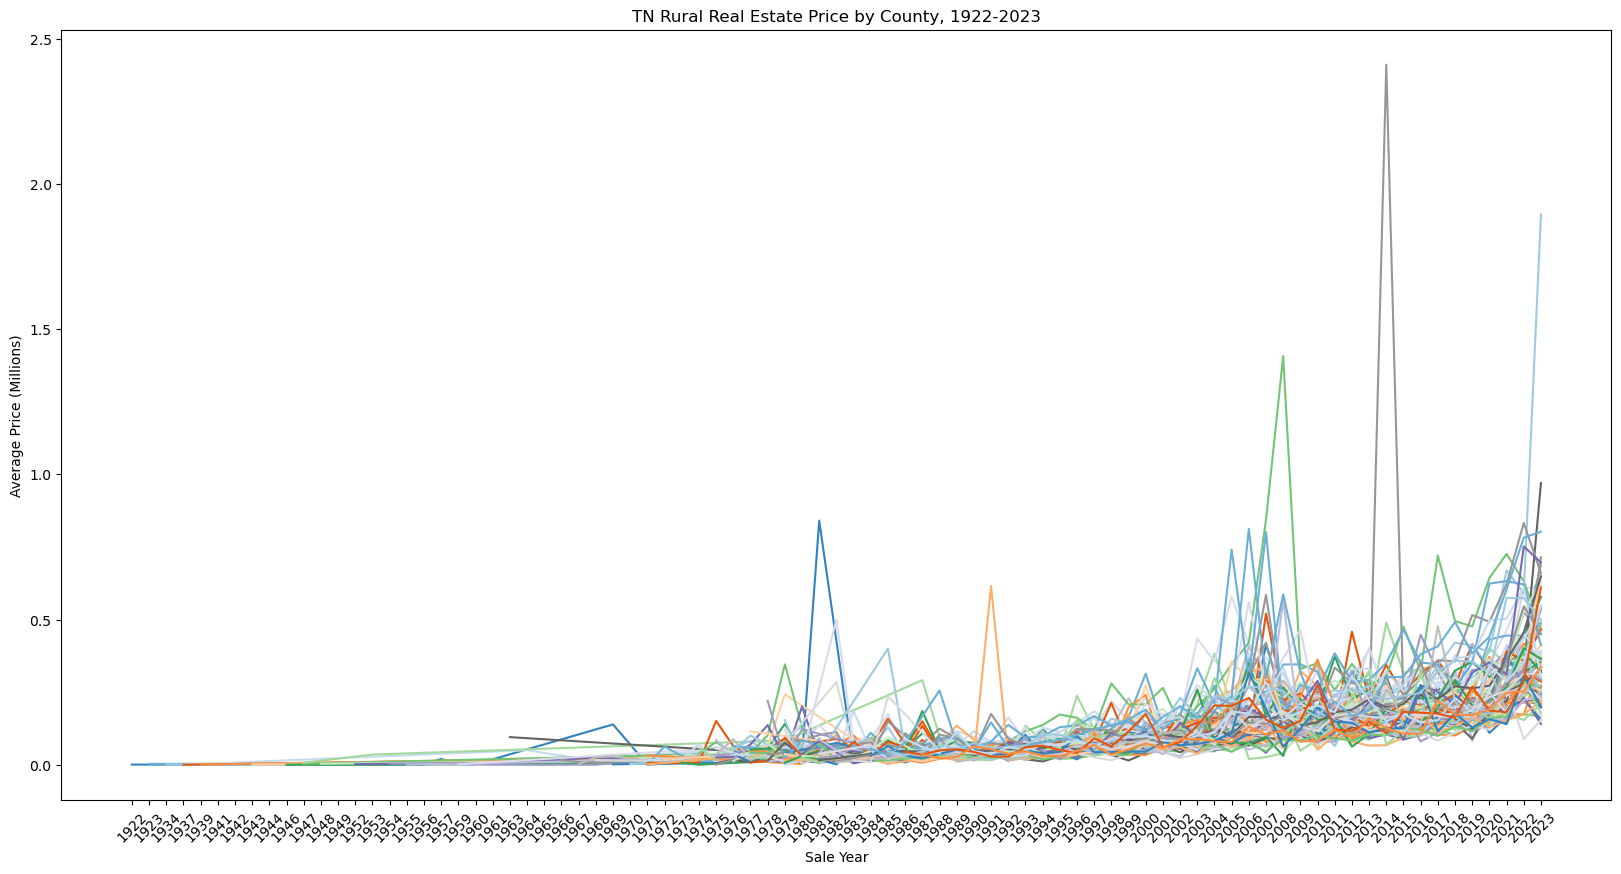

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))

vis_group['PRICE_scaled'] = vis_group['PRICE'] / 1_000_000

# vis_group = vis_group[(vis_group['SALEYEAR'] >= '1973') & (vis_group['SALEYEAR'] <= '2023')]

sns.lineplot(data=vis_group, x='SALEYEAR', y='PRICE_scaled', hue='COUNTY', legend=False, palette='tab20c')
plt.title("TN Rural Real Estate Price by County, 1922-2023")
plt.xlabel("Sale Year")
plt.ylabel("Average Price (Millions)")
plt.xticks(rotation=45)
# recessions = [
#     (1923, 1924), (1926, 1927), (1929, 1933), 
#     (1937, 1938), (1945, 1945), (1948, 1949), 
#     (1953, 1954), (1957, 1958), (1960, 1961), 
#     (1969, 1970), (1973, 1975), (1980, 1980), 
#     (1981, 1982), (1990, 1991), (2001, 2001), 
#     (2007, 2009), (2020, 2020)]

# for start, end in recessions:
#     plt.axvspan(str(start), str(end), color='gray', alpha=0.1)
    
plt.show()

In [ ]:
# price per acre vs. acreage: (do we saw the parabolic trend?)
# control for county, IMP, inflation?
# IMPVALUE + LANDVALUE = VALUE
# V_SALEYEAR is last deed transfer
# implement use category; no improvements (IMPVALUE = 0)
# vsaleprice / acres vs. acres
# Bo + B1acre + acre^2 + county_dummy + year_dummy + ...
# roadtype? topotype?
# all years
# if v_price = 0, it didn't sell
# what drives difference 